In [3]:
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays
!pip install kmodes
!pip install missingno
!pip install folium

In [210]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import missingno as msno
import folium
import plotly.express as px
import plotly.graph_objects as go
import sort_dataframeby_monthorweek as sd

In [211]:
from folium.plugins import HeatMap
from plotly.subplots import make_subplots
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [212]:
#Đọc dữ liệu 
df = pd.read_csv("hotel.csv")

# Mô tả dữ liệu

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   IsCanceled                   119390 non-null  int64  
 1   LeadTime                     119390 non-null  int64  
 2   ArrivalDateYear              119390 non-null  int64  
 3   ArrivalDateMonth             119390 non-null  object 
 4   ArrivalDateWeekNumber        119390 non-null  int64  
 5   ArrivalDateDayOfMonth        119390 non-null  int64  
 6   StaysInWeekendNights         119390 non-null  int64  
 7   StaysInWeekNights            119390 non-null  int64  
 8   Adults                       119390 non-null  int64  
 9   Children                     119386 non-null  float64
 10  Babies                       119390 non-null  int64  
 11  Meal                         119390 non-null  object 
 12  Country                      118902 non-null  object 
 13 

In [214]:
# Chuyển đổi cột 'Agent' và 'Company' từ object sang số
df['Agent'] = pd.to_numeric(df['Agent'], errors='coerce')
df['Company'] = pd.to_numeric(df['Company'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   IsCanceled                   119390 non-null  int64  
 1   LeadTime                     119390 non-null  int64  
 2   ArrivalDateYear              119390 non-null  int64  
 3   ArrivalDateMonth             119390 non-null  object 
 4   ArrivalDateWeekNumber        119390 non-null  int64  
 5   ArrivalDateDayOfMonth        119390 non-null  int64  
 6   StaysInWeekendNights         119390 non-null  int64  
 7   StaysInWeekNights            119390 non-null  int64  
 8   Adults                       119390 non-null  int64  
 9   Children                     119386 non-null  float64
 10  Babies                       119390 non-null  int64  
 11  Meal                         119390 non-null  object 
 12  Country                      118902 non-null  object 
 13 

In [264]:
# Liệt kê dữ liệu null
df.isnull().sum()

IsCanceled                          0
LeadTime                            0
ArrivalDateYear                     0
ArrivalDateMonth                    0
ArrivalDateWeekNumber               0
ArrivalDateDayOfMonth               0
StaysInWeekendNights                0
StaysInWeekNights                   0
Adults                              0
Children                            4
Babies                              0
Meal                                0
Country                           488
MarketSegment                       0
DistributionChannel                 0
IsRepeatedGuest                     0
PreviousCancellations               0
PreviousBookingsNotCanceled         0
ReservedRoomType                    0
AssignedRoomType                    0
BookingChanges                      0
DepositType                         0
Agent                           16340
Company                        112593
DaysInWaitingList                   0
CustomerType                        0
ADR         

In [265]:
#Tỉ lệ dữ liệu null
(df.isnull().sum().sum() / (119390 * 32)) * 100

3.387663330262166

In [266]:
# Liệt kê chỉ số của các thuộc tính định lượng như: đếm số giá trị, giá trị lớn nhất, giá trị nhỏ nhất, trung bình, độ lệch chuẩn và tứ phân vị
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IsCanceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
LeadTime,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
ArrivalDateYear,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
ArrivalDateWeekNumber,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
ArrivalDateDayOfMonth,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
StaysInWeekendNights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
StaysInWeekNights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
Adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
Children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
Babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [267]:
# Thuộc tính định tính: liệt kê số giá trị, số lượng các giá  trị khác nhau trong từng thuộc tính, giá trị có tần số xuất hiện cao nhất của thuộc  tính đó và tần số của giá trị đó.
df.describe(include = "object").T

,count,unique,top,freq
ArrivalDateMonth,119390,12,August,13877
Meal,119390,5,BB,92310
Country,118902,177,PRT,48590
MarketSegment,119390,8,Online TA,56477
DistributionChannel,119390,5,TA/TO,97870
ReservedRoomType,119390,10,A,85994
AssignedRoomType,119390,12,A,74053
DepositType,119390,3,No Deposit,104641
CustomerType,119390,4,Transient,89613
ReservationStatus,119390,3,Check-Out,75166


# LÀM SẠCH DỮ LIỆU

<H4>XỬ LÝ DỮ LIỆU BỊ NHIỄU</H4> 

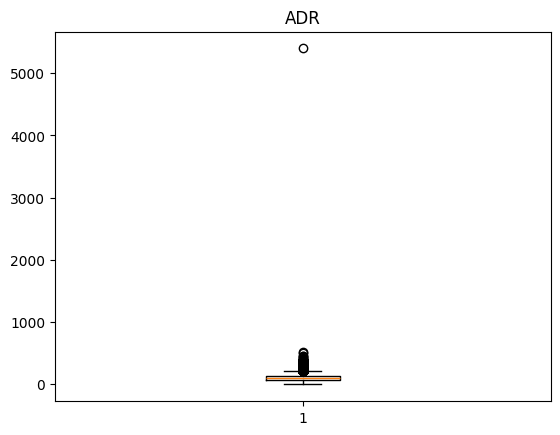

In [268]:
#In ra biểu đồ Boxplot để xem giá trị ngoại lệ của cột ADR
plt.boxplot(df['ADR'])
plt.title('ADR')
plt.show()

In [269]:
# Loại bỏ ngoại lệ của cột ADR
df_no = df.copy()
df_no = df_no.drop(df_no[df_no.ADR < 0].index)
df_no = df_no.drop(df_no[df_no.ADR > 5000].index)

<H4>XỬ LÝ DỮ LIỆU BỊ NULL</H4> 

In [270]:
# Tìm trong dữ liệu giá trị null, tính tổng chúng lại, sắp xếp giảm dần
total = df_no.isnull().sum().sort_values(ascending=False)

# Tổng giá trị null của một cột/ số dòng của cột null đó
percent_1=df_no.isnull().sum()/df_no.isnull().count()*100

# Làm tròn 1 chữ số và sắp giảm dần
percent_2 = (round(percent_1,2)).sort_values(ascending = False)

# Xuất 5 thuộc tính có số lượng giá trị rỗng nhiều nhất
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head(5)

,Total,%
Company,112591,94.31
Agent,16340,13.69
Country,488,0.41
Children,4,0.00
IsCanceled,0,0.00


In [271]:
# Xóa các dòng Childern bị null
df_no.dropna(subset=['Children'], inplace=True)

In [272]:
# Xem thông tin của Country
df_no['Country'].describe()

count     118896
unique       177
top          PRT
freq       48585
Name: Country, dtype: object

In [273]:
# Nhận thấy rằng, giá trị "PRT" phổ biến nhất nên ta chọn giá trị đó để điền vào các vị trí còn trống
df_no['Country'].fillna(df_no['Country'].mode().to_string(), inplace=True)

In [274]:
# Cho các giá trị null của Agent và Company thành lần lượt là ‘No Agent’ và ‘No Company’. 
df_no['Agent'] = df_no['Agent'].fillna('No Agent')
df_no['Company'] = df_no['Company'].fillna('No Company')

In [275]:
# Liệt kê dữ liệu null
df_no.isnull().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
Company                        0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
Reservatio

<h4>KIỂM TRA Ý NGHĨA DỮ LIỆU</h4>

In [276]:
# Cột filter dùng để kiểm tra có sự tồn tại của cùng lúc bằng 0 của các thuộc tính về số lượng người
filter = (df_no.Children == 0) & (df_no.Adults == 0) & (df_no.Babies == 0)
filter

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119384, dtype: bool

In [277]:
# Xuất ra các dòng có giá trị True trong cột thuộc tính filter
df_no[filter]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,hotel
2224,0,1,2015,October,41,6,0,3,0,0.0,...,No Agent,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015,h1
2409,0,0,2015,October,42,12,0,0,0,0.0,...,No Agent,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015,h1
3181,0,36,2015,November,47,20,1,2,0,0.0,...,38.0,No Company,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015,h1
3684,0,165,2015,December,53,30,1,4,0,0.0,...,308.0,No Company,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016,h1
3708,0,165,2015,December,53,30,2,4,0,0.0,...,308.0,No Company,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016,h1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,0,107,2017,June,26,27,0,3,0,0.0,...,7.0,No Company,0,Transient,100.80,0,0,Check-Out,6/30/2017,h2
115091,0,1,2017,June,26,30,0,1,0,0.0,...,No Agent,No Company,0,Transient,0.00,1,1,Check-Out,7/1/2017,h2
116251,0,44,2017,July,28,15,1,1,0,0.0,...,425.0,No Company,0,Transient,73.80,0,0,Check-Out,7/17/2017,h2
116534,0,2,2017,July,28,15,2,5,0,0.0,...,9.0,No Company,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017,h2


In [278]:
# Xóa các dòng cả 3 thuộc tính về người đều bằng 0
df_no = df_no.drop(df_no.index[filter])

<h4>KIỂM TRA THUỘC TÍNH DỮ LIỆU</h4>

In [279]:
df_no.dtypes

IsCanceled                       int64
LeadTime                         int64
ArrivalDateYear                  int64
ArrivalDateMonth                object
ArrivalDateWeekNumber            int64
ArrivalDateDayOfMonth            int64
StaysInWeekendNights             int64
StaysInWeekNights                int64
Adults                           int64
Children                       float64
Babies                           int64
Meal                            object
Country                         object
MarketSegment                   object
DistributionChannel             object
IsRepeatedGuest                  int64
PreviousCancellations            int64
PreviousBookingsNotCanceled      int64
ReservedRoomType                object
AssignedRoomType                object
BookingChanges                   int64
DepositType                     object
Agent                           object
Company                         object
DaysInWaitingList                int64
CustomerType             

In [280]:
#Thay đổi từ float sang int
df_no['StaysInWeekendNights'] = df_no['StaysInWeekendNights'].astype(int)
df_no['StaysInWeekNights'] = df_no['StaysInWeekNights'].astype(int)
df_no['Adults'] = df_no['Adults'].astype(int)
df_no['Children'] = df_no['Children'].astype(int)
df_no['Babies'] = df_no['Babies'].astype(int)
df_no['PreviousCancellations'] = df_no['PreviousCancellations'].astype(int)
df_no['PreviousBookingsNotCanceled'] = df_no['PreviousBookingsNotCanceled'].astype(int)
df_no['BookingChanges'] = df_no['BookingChanges'].astype(int)
df_no['DaysInWaitingList'] = df_no['DaysInWaitingList'].astype(int)
df_no['RequiredCarParkingSpaces'] = df_no['RequiredCarParkingSpaces'].astype(int)
df_no['TotalOfSpecialRequests'] = df_no['TotalOfSpecialRequests'].astype(int)

In [281]:
# Đổi từ object sang date
df_no['ReservationStatusDate'] = pd.to_datetime(df_no['ReservationStatusDate'])

<h4>Kiểm tra dữ liệu trùng</h4>

In [282]:
# Kiểm tra có dòng dữ liệu trùng không?
df_no.duplicated().any()

True

In [283]:
# Đếm số dòng trùng nhau
num_duplicate_rows = df_no.duplicated().sum()
print(num_duplicate_rows)

31980


In [284]:
# Xóa các dòng trùng lặp, chỉ giữ lại dòng đầu tiên
df_cleaned = df_no.drop_duplicates(keep='first')
df_cleaned

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,hotel
0,0,342,2015,July,27,1,0,0,2,0,...,No Agent,No Company,0,Transient,0.00,0,0,Check-Out,2015-07-01,h1
1,0,737,2015,July,27,1,0,0,2,0,...,No Agent,No Company,0,Transient,0.00,0,0,Check-Out,2015-07-01,h1
2,0,7,2015,July,27,1,0,1,1,0,...,No Agent,No Company,0,Transient,75.00,0,0,Check-Out,2015-07-02,h1
3,0,13,2015,July,27,1,0,1,1,0,...,304.0,No Company,0,Transient,75.00,0,0,Check-Out,2015-07-02,h1
4,0,14,2015,July,27,1,0,2,2,0,...,240.0,No Company,0,Transient,98.00,0,1,Check-Out,2015-07-03,h1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,August,35,30,2,5,2,0,...,394.0,No Company,0,Transient,96.14,0,0,Check-Out,2017-09-06,h2
119386,0,102,2017,August,35,31,2,5,3,0,...,9.0,No Company,0,Transient,225.43,0,2,Check-Out,2017-09-07,h2
119387,0,34,2017,August,35,31,2,5,2,0,...,9.0,No Company,0,Transient,157.71,0,4,Check-Out,2017-09-07,h2
119388,0,109,2017,August,35,31,2,5,2,0,...,89.0,No Company,0,Transient,104.40,0,0,Check-Out,2017-09-07,h2


# THÊM THUỘC TÍNH CHO DỮ LIỆU

In [285]:
# Chuyển đổi thuộc tính ArrivalDateMonth thành số
months = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}
for DF in [df_cleaned]:
    DF["ArrivalDateMonth"] = DF["ArrivalDateMonth"].map(months)
    
# Tạo thuộc tính ArrivalDate kiểu dữ liệu datetime thông qua ba thuộc tính: ArrivalDateYear, ArrivalDateMonth và ArrivalDateDayOfMonth
cols=["ArrivalDateYear","ArrivalDateMonth","ArrivalDateDayOfMonth"]
df_cleaned['ArrivalDate'] = df_cleaned[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df_cleaned['ArrivalDate'] = pd.to_datetime(df_cleaned['ArrivalDate'])

In [286]:
# Tạo thuộc tính StatuMinusArrivalDate là hiệu số giữa ArrivalDate và  ReservationStatusDate. 
df_cleaned['StatuMinusArrivalDate'] = np.abs(df_cleaned['ArrivalDate'] - df_cleaned['ReservationStatusDate']).astype(str)
def format_lenght(date):
    return date[0]
df_cleaned['StatuMinusArrivalDate'] = df_cleaned['StatuMinusArrivalDate'].map(format_lenght).astype(int)

In [287]:
# Tạo thuộc tính TotalNights là tổng của StaysInWeekendNights và StaysInWeekNights
df_cleaned['TotalNights'] = df_cleaned['StaysInWeekendNights'] + df_cleaned['StaysInWeekNights']

In [288]:
# Tạo thuộc tính RoomMatch: là sự kết hợp giữa hai thuộc tính ReservedRoomType và AssignedRoomType chỉ ra liệu giữa phòng đã đặt trước và phòng đã chỉ định của khách có giống nhau hay không. 
df_cleaned['RoomMatch'] = (df_cleaned['ReservedRoomType'] == df_cleaned['AssignedRoomType']) * 1

In [289]:
# Tạo thuộc tính TotalPeople là tổng số lượng người lấy từ các thuộc tính Adults, Children, Babies. 
df_cleaned['TotalPeople'] = df_cleaned['Adults'] + df_cleaned['Children'] + df_cleaned['Babies']

In [290]:
# Tạo thuộc tính HaveChild dựa trên các thuộc tính Children, Babies có số lượng nhiều hơn 0 trong tập dữ liệu.
df_cleaned['HaveChild'] = ((df_cleaned['Children'] != 0) | (df_cleaned['Babies'] != 0)) * 1

In [291]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87224 entries, 0 to 119389
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   IsCanceled                   87224 non-null  int64         
 1   LeadTime                     87224 non-null  int64         
 2   ArrivalDateYear              87224 non-null  int64         
 3   ArrivalDateMonth             87224 non-null  int64         
 4   ArrivalDateWeekNumber        87224 non-null  int64         
 5   ArrivalDateDayOfMonth        87224 non-null  int64         
 6   StaysInWeekendNights         87224 non-null  int32         
 7   StaysInWeekNights            87224 non-null  int32         
 8   Adults                       87224 non-null  int32         
 9   Children                     87224 non-null  int32         
 10  Babies                       87224 non-null  int32         
 11  Meal                         87224 non-null  

# XÓA BỚT THUỘC TÍNH CỦA DỮ LIỆU

In [292]:
# Chuyển đổi các cột phân loại thành dạng số
df_cor = df_cleaned.copy()
le = LabelEncoder()
col_ob = [
    'Meal',
    'Country',
    'MarketSegment',
    'DistributionChannel',
    'ReservedRoomType',
    'AssignedRoomType',
    'DepositType',
    'CustomerType',
    'ReservationStatus',
]
for col in col_ob:
    df_cor[col] = le.fit_transform(df_cor[col])
    
# Lọc ra các cột có kiểu dữ liệu là số
numerical_columns = df_cor.select_dtypes(include=[np.number])

# Tính hệ số tương quan tuyệt đối giữa các cột số và 'IsCanceled', sắp xếp theo độ lớn từ cao xuống
correlation_with_is_canceled = numerical_columns.corr()['IsCanceled'].abs().sort_values(ascending=False)[1:]

# Hiển thị kết quả
print(correlation_with_is_canceled)

ReservationStatus              0.888725
RoomMatch                      0.213332
LeadTime                       0.184621
RequiredCarParkingSpaces       0.184445
MarketSegment                  0.182094
DistributionChannel            0.150312
DepositType                    0.137462
ADR                            0.132829
TotalOfSpecialRequests         0.120846
Country                        0.100853
TotalPeople                    0.098975
BookingChanges                 0.093222
IsRepeatedGuest                0.088730
ArrivalDateYear                0.088179
TotalNights                    0.085494
StaysInWeekNights              0.084208
Adults                         0.080232
Children                       0.067213
StaysInWeekendNights           0.061058
AssignedRoomType               0.060847
PreviousBookingsNotCanceled    0.052165
PreviousCancellations          0.051512
HaveChild                      0.051458
ReservedRoomType               0.047515
Meal                           0.046105


In [293]:
# Xóa các thuộc tính không cần thiết
df_cleaned=df_cleaned.drop(['DaysInWaitingList', 'ArrivalDateYear','ArrivalDateMonth', 'ArrivalDateWeekNumber', 
                    'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights', 'Children', 'Babies',
                    'ReservedRoomType', 'AssignedRoomType', 'Agent', 'Company', 'ReservationStatusDate', 'ArrivalDate', 'ReservationStatus'],axis=1)

# RỜI RẠC HÓA DỮ LIỆU

In [294]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
IsCanceled,87224.0,0.275199,0.446617,0.0,0.00,0.0,1.0,1.0
LeadTime,87224.0,79.973746,86.059046,0.0,11.00,49.0,125.0,737.0
Adults,87224.0,1.879345,0.621733,0.0,2.00,2.0,2.0,55.0
IsRepeatedGuest,87224.0,0.038556,0.192535,0.0,0.00,0.0,0.0,1.0
PreviousCancellations,87224.0,0.030404,0.369357,0.0,0.00,0.0,0.0,26.0
PreviousBookingsNotCanceled,87224.0,0.184043,1.733082,0.0,0.00,0.0,0.0,72.0
BookingChanges,87224.0,0.268481,0.710626,0.0,0.00,0.0,0.0,18.0
ADR,87224.0,106.462163,51.880086,0.0,72.25,98.2,134.1,510.0
RequiredCarParkingSpaces,87224.0,0.084312,0.281667,0.0,0.00,0.0,0.0,8.0
TotalOfSpecialRequests,87224.0,0.698925,0.832059,0.0,0.00,0.0,1.0,5.0


<h4>LeadTime</h4>

In [295]:
# Mô tả
df_cleaned["LeadTime"].describe()

count    87224.000000
mean        79.973746
std         86.059046
min          0.000000
25%         11.000000
50%         49.000000
75%        125.000000
max        737.000000
Name: LeadTime, dtype: float64

In [296]:
# LeadTime có giá trị lớn nhất là 737 và nhỏ nhất là 0 nên ta sẽ dùng phương pháp làm mịn binning
test = pd.qcut(df_cleaned["LeadTime"], q=4)
# Đếm giá trị thuộc tính mỗi giỏ và hiển thị mỗi giỏ có bao  nhiêu giá trị. 
test.value_counts()

LeadTime
(-0.001, 11.0]    21880
(11.0, 49.0]      21836
(49.0, 125.0]     21796
(125.0, 737.0]    21712
Name: count, dtype: int64

In [297]:
# Các giỏ được đánh số theo số thứ tự từ 1 đến 4 cho các khoảng tăng dần
for dataset in [df_cleaned]:
    dataset.loc[dataset['LeadTime']<=11,'LeadTime']=1
    dataset.loc[(dataset['LeadTime']>11) & (dataset['LeadTime']<=49),'LeadTime']=2
    dataset.loc[(dataset['LeadTime']>49) & (dataset['LeadTime']<=125),'LeadTime']=3
    dataset.loc[dataset['LeadTime']>125,'LeadTime']=4
    dataset['LeadTime']=dataset['LeadTime'].astype(int)

<h4>Adults</h4>

In [298]:
# Mô tả
df_cleaned["Adults"].describe()

count    87224.000000
mean         1.879345
std          0.621733
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: Adults, dtype: float64

In [299]:
# Adults có giá trị lớn nhất là 55 và nhỏ nhất là 0 nên ta sẽ dùng phương pháp làm mịn binning
test = pd.qcut(df_cleaned["Adults"], q=2)
# Đếm giá trị thuộc tính mỗi giỏ và hiển thị mỗi giỏ có bao  nhiêu giá trị. 
test.value_counts()

Adults
(-0.001, 2.0]    81214
(2.0, 55.0]       6010
Name: count, dtype: int64

In [300]:
# Các giỏ được đánh số theo số thứ tự từ 1 đến 2 cho các khoảng tăng dần
for dataset in [df_cleaned]:
    dataset.loc[dataset['Adults']<=2,'Adults']=1
    dataset.loc[dataset['Adults']>2,'Adults']=2
    dataset['Adults']=dataset['Adults'].astype(int)

<h4>ADR</h4>

In [301]:
# Mô tả
df_cleaned["ADR"].describe()

count    87224.000000
mean       106.462163
std         51.880086
min          0.000000
25%         72.250000
50%         98.200000
75%        134.100000
max        510.000000
Name: ADR, dtype: float64

In [302]:
# ADR có giá trị lớn nhất là 510 và nhỏ nhất là 0 nên ta sẽ dùng phương pháp làm mịn binning
test = pd.qcut(df_cleaned["ADR"], q=4)
# Đếm giá trị thuộc tính mỗi giỏ và hiển thị mỗi giỏ có bao  nhiêu giá trị. 
test.value_counts()

ADR
(-0.001, 72.25]    22042
(98.2, 134.1]      21879
(134.1, 510.0]     21732
(72.25, 98.2]      21571
Name: count, dtype: int64

In [303]:
# Các giỏ được đánh số theo số thứ tự từ 1 đến 4 cho các khoảng tăng dần
for dataset in [df_cleaned]:
    dataset.loc[dataset['ADR']<=72.25,'ADR']=1
    dataset.loc[(dataset['ADR']>72.25) & (dataset['ADR']<=98.2),'ADR']=2
    dataset.loc[(dataset['ADR']>98.2) & (dataset['ADR']<=134.1),'ADR']=3
    dataset.loc[dataset['ADR']>134.1,'ADR']=4
    dataset['ADR']=dataset['ADR'].astype(int)

<h4>StatuMinusArrivalDate</h4>

In [304]:
# Mô tả
df_cleaned["StatuMinusArrivalDate"].describe()

count    87224.000000
mean         3.091970
std          2.142527
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: StatuMinusArrivalDate, dtype: float64

In [305]:
# StatuMinusArrivalDate có giá trị lớn nhất là 9 và nhỏ nhất là 0 nên ta sẽ dùng phương pháp làm mịn binning
test = pd.qcut(df_cleaned["StatuMinusArrivalDate"], q=3)
# Đếm giá trị thuộc tính mỗi giỏ và hiển thị mỗi giỏ có bao  nhiêu giá trị. 
test.value_counts()

StatuMinusArrivalDate
(-0.001, 2.0]    41493
(2.0, 4.0]       26230
(4.0, 9.0]       19501
Name: count, dtype: int64

In [306]:
## Các giỏ được đánh số theo số thứ tự từ 1 đến 3 cho các khoảng tăng dần
for dataset in [df_cleaned]:
    dataset.loc[dataset['StatuMinusArrivalDate']<=2,'StatuMinusArrivalDate']=1
    dataset.loc[(dataset['StatuMinusArrivalDate']>2) & (dataset['StatuMinusArrivalDate']<=4),'StatuMinusArrivalDate']=2
    dataset.loc[dataset['StatuMinusArrivalDate']>4,'StatuMinusArrivalDate']=3
    dataset['StatuMinusArrivalDate']=dataset['StatuMinusArrivalDate'].astype(int)

<h4>TotalNights</h4>

In [307]:
# Mô tả
df_cleaned["TotalNights"].describe()

count    87224.000000
mean         3.628520
std          2.742894
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         69.000000
Name: TotalNights, dtype: float64

In [308]:
# TotalNights có giá trị lớn nhất là 69 và nhỏ nhất là 0 nên ta sẽ dùng phương pháp làm mịn binning
test = pd.qcut(df_cleaned["TotalNights"], q=4)
# Đếm giá trị thuộc tính mỗi giỏ và hiển thị mỗi giỏ có bao  nhiêu giá trị. 
test.value_counts()

TotalNights
(-0.001, 2.0]    33490
(3.0, 5.0]       20294
(2.0, 3.0]       17827
(5.0, 69.0]      15613
Name: count, dtype: int64

In [309]:
## Các giỏ được đánh số theo số thứ tự từ 1 đến 4 cho các khoảng tăng dần
for dataset in [df_cleaned]:
    dataset.loc[dataset['TotalNights']<=2,'TotalNights']=1
    dataset.loc[(dataset['TotalNights']>2) & (dataset['TotalNights']<=3),'TotalNights']=2
    dataset.loc[(dataset['TotalNights']>3) & (dataset['TotalNights']<=5),'TotalNights']=3
    dataset.loc[dataset['TotalNights']>5,'TotalNights']=4
    dataset['TotalNights']=dataset['TotalNights'].astype(int)

<h4>TotalPeople</h4>

In [310]:
# Mô tả
df_cleaned["TotalPeople"].describe()

count    87224.000000
mean         2.029097
std          0.790162
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: TotalPeople, dtype: float64

In [311]:
# TotalPeople có giá trị lớn nhất là 55 và nhỏ nhất là 1 nên ta sẽ dùng phương pháp làm mịn binning
test = pd.qcut(df_cleaned["TotalNights"], q=2)
# Đếm giá trị thuộc tính mỗi giỏ và hiển thị mỗi giỏ có bao  nhiêu giá trị. 
test.value_counts()

TotalNights
(0.999, 2.0]    51317
(2.0, 4.0]      35907
Name: count, dtype: int64

In [312]:
## Các giỏ được đánh số theo số thứ tự từ 1 đến 2 cho các khoảng tăng dần
for dataset in [df_cleaned]:
    dataset.loc[dataset['TotalPeople']<=2,'TotalPeople']=1
    dataset.loc[dataset['TotalPeople']>2,'TotalPeople']=2
    dataset['TotalPeople']=dataset['TotalPeople'].astype(int)

# DÁN NHÃN SỐ CHO CÁC DỮ LIỆU ĐỊNH TÍNH

In [313]:
# Sử dụng hàm Label Encoding
le = LabelEncoder()
col_ob = [
    'Meal',
    'Country',
    'MarketSegment',
    'DistributionChannel',
    'DepositType',
    'CustomerType',
    'hotel',
]
for col in col_ob:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

df_cleaned.head(10)

,IsCanceled,LeadTime,Adults,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,...,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,hotel,StatuMinusArrivalDate,TotalNights,RoomMatch,TotalPeople,HaveChild
0,0,4,1,0,136,3,1,0,0,0,...,2,1,0,0,0,1,1,1,1,0
1,0,4,1,0,136,3,1,0,0,0,...,2,1,0,0,0,1,1,1,1,0
2,0,1,1,0,60,3,1,0,0,0,...,2,2,0,0,0,1,1,0,1,0
3,0,2,1,0,60,2,0,0,0,0,...,2,2,0,0,0,1,1,1,1,0
4,0,2,1,0,60,6,3,0,0,0,...,2,2,0,1,0,1,1,1,1,0
6,0,1,1,0,136,3,1,0,0,0,...,2,3,0,0,0,1,1,1,1,0
7,0,1,1,1,136,3,1,0,0,0,...,2,3,0,1,0,1,1,1,1,0
8,1,3,1,0,136,6,3,0,0,0,...,2,2,0,1,0,3,2,1,1,0
9,1,3,1,2,136,5,3,0,0,0,...,2,3,0,0,0,3,2,1,1,0
10,1,2,1,0,136,6,3,0,0,0,...,2,3,0,0,0,3,3,1,1,0


# LẤY MẪU DỮ LIỆU

In [314]:
# Kiểm tra các giá trị trong thuộc tính IsCanceled
value_counts = df_cleaned['IsCanceled'].value_counts()
print(value_counts)

IsCanceled
0    63220
1    24004
Name: count, dtype: int64


In [315]:
# Trộn lẫn dữ liệu.
shuffled_df = df_cleaned.sample(frac=1, random_state=4)

# Đặt tất cả các trường hợp hủy phòng vào một bộ dữ liệu riêng.
Canceled_df = shuffled_df.loc[shuffled_df['IsCanceled'] == 1]

# Chọn ngẫu nhiên 492 quan sát từ nhóm không hủy phòng (lớp đa số)
NonCanceled_df = shuffled_df.loc[shuffled_df['IsCanceled'] == 0].sample(n=df_cleaned["IsCanceled"].value_counts()[1], random_state=42)

# Ghép hai bảng dữ liệu lại với nhau
sampling_df = pd.concat([Canceled_df, NonCanceled_df])

In [316]:
# kiểm tra kết quả
value_counts = sampling_df['IsCanceled'].value_counts()
print(value_counts)

IsCanceled
1    24004
0    24004
Name: count, dtype: int64


# XUẤT FILE KẾT QUẢ

In [317]:
sampling_df.to_csv("Hotel_DataMining.csv",index = False)